<a href="https://colab.research.google.com/github/prasad-dash/COVID-Model/blob/main/CovidRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn import preprocessing


In [ ]:
dataset=pd.read_csv("/content/COVID-19 Cases(18-04-2021).csv")
datasetIN=dataset[dataset['Region']=='India']

In [ ]:
X=datasetIN.iloc[:,4].values
iShape=X.shape
print(iShape)
X=X.reshape(393,1)
print(X.max(),X.min())
Scaler=preprocessing.StandardScaler()
Xsc=Scaler.fit_transform(X)
Xsc=Xsc.reshape(iShape)
print(Xsc.shape)
DataLen=len(Xsc)
print(DataLen)

(393,)
1569743.0 71.0
(393,)
393


In [ ]:
Xsc.max()

3.6970384322808507

In [ ]:
X_train=[]
y_train=[]
for i in range(10,DataLen):
    temp=Xsc[i-10:i]
    X_train.append(temp)
    y_train.append(Xsc[i])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
X_train=X_train.reshape(len(X_train),10,1)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(1000,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(1000,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(1000,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(1000,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(1,return_sequences=False))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 1000)          4008000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 1000)          8004000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 1000)          8004000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 1000)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 10, 1000)         

In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
12/12 [==============================] - 6s 50ms/step - loss: 0.5739
Epoch 2/100
12/12 [==============================] - 1s 43ms/step - loss: 0.2847
Epoch 3/100
12/12 [==============================] - 1s 43ms/step - loss: 0.2377
Epoch 4/100
12/12 [==============================] - 1s 44ms/step - loss: 0.2076
Epoch 5/100
12/12 [==============================] - 1s 46ms/step - loss: 0.1544
Epoch 6/100
12/12 [==============================] - 1s 43ms/step - loss: 0.1336
Epoch 7/100
12/12 [==============================] - 1s 43ms/step - loss: 0.1444
Epoch 8/100
12/12 [==============================] - 1s 43ms/step - loss: 0.1342
Epoch 9/100
12/12 [==============================] - 1s 42ms/step - loss: 0.1652
Epoch 10/100
12/12 [==============================] - 1s 43ms/step - loss: 0.1641
Epoch 11/100
12/12 [==============================] - 1s 43ms/step - loss: 0.1395
Epoch 12/100
12/12 [==============================] - 1s 44ms/step - loss: 0.1282
Epoch 13/100
12/12 [=====

In [ ]:
model.save('/content/CovidRNN.h5')

In [ ]:
inputEle=Xsc[-11:-1]

In [ ]:
inputEle=inputEle.reshape(1,10,1)

In [ ]:
model.predict(inputEle)

array([[0.99999714]], dtype=float32)

In [ ]:
Scaler.inverse_transform(model.predict(inputEle))

array([[701040.4]], dtype=float32)

In [ ]:
np.reshape(X,(393,))

In [ ]:
y=[]
for i in range(10,393):
    temp=Xsc[i-10:i]
    temp=temp.reshape(1,10,1)
    y.append(Scaler.inverse_transform(model.predict(temp)))



In [ ]:
y=np.array(y)
y=y.reshape(383,)
temp=np.zeros((393,))
temp[10:]=y
y=temp

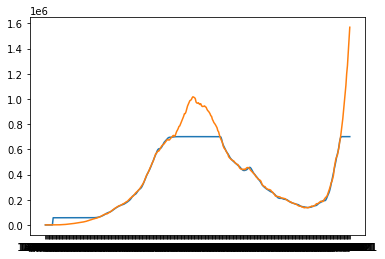

In [ ]:
plt.plot(datasetIN['Date'],y)
plt.plot(datasetIN['Date'],X)